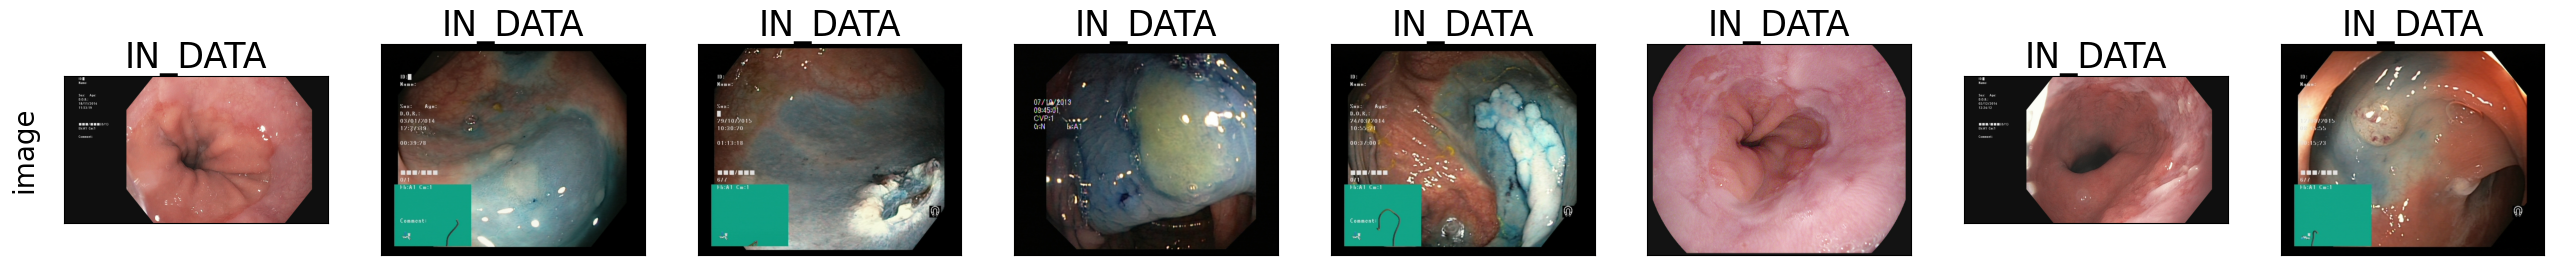

tensor([[[0.0118, 0.0118, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
         [0.0157, 0.0118, 0.0118,  ..., 0.0118, 0.0118, 0.0118],
         [0.0157, 0.0118, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
         ...,
         [0.0039, 0.0039, 0.0039,  ..., 0.0078, 0.0078, 0.0039],
         [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0000, 0.0000],
         [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
         [0.0235, 0.0196, 0.0118,  ..., 0.0118, 0.0118, 0.0118],
         [0.0235, 0.0196, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
         ...,
         [0.0039, 0.0039, 0.0039,  ..., 0.0078, 0.0078, 0.0078],
         [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
         [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039]],

        [[0.0078, 0.0078, 0.0078,  ..., 0.0157, 0.0078, 0.0078],
         [0.0118, 0.0078, 0.0039,  ..., 0.0118, 0.0039, 0.0039],
         [0.0118, 0.0078, 0.0078,  ..., 0.0078, 0.0157, 0.

In [11]:
import os
from froodo import SampleDataset
from torch.utils.data import Dataset
import torch
from PIL import Image
from torchvision import transforms
from froodo import Sample

import numpy as np


class KsavirDataset(Dataset,SampleDataset):
    def __init__(self, root_path: str) -> None:
        super().__init__()
        self.root_path = root_path
        #self.images = glob.glob(root_path + "/*/")
        self.images = []
        for folder in os.listdir(root_path):
            self.images += [folder + "/" + file for file in os.listdir(root_path +"/"+folder)]
        self.convert_to_tensor = transforms.PILToTensor()

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index) -> torch.Tensor:
        img = Image.open(self.root_path + "/" + self.images[index])
        image = self.convert_to_tensor(img) / 255
        return Sample(image)



ksavir_dataset = KsavirDataset("G:\FrOoDo\Datasets\kvasir-dataset-v2")
assert len(ksavir_dataset)==8000

ksavir_dataset.sample()
print(ksavir_dataset[0].image)

In [26]:
from froodo import OODAugmentation, SampableAugmentation
from froodo.ood.augmentations.pathology.artifacts import ArtifactAugmentation

#from froodo.ood.augmentations.pathology.artifacts import data_folder

data_folder = "G:/FrOoDo/FrOoDo/froodo/ood/augmentations/pathology/artifacts/imgs"

import random
from os import listdir
from os.path import join

class CoinAugmentation(ArtifactAugmentation, OODAugmentation, SampableAugmentation):
    def __init__(self) -> None:
        super().__init__()

    def _apply_sampling(self):
        return super()._apply_sampling()
        
    def _augment(self, sample: Sample) -> Sample:
        img, mask = super().transparentOverlay(
            sample["image"],
            sample["ood_mask"],
            overlay_path=join(
                data_folder,
                f"coins/{random.choice(listdir(join(data_folder,'coins')))}",
            )
        )
        sample["image"] = img
        sample["ood_mask"] = mask

        return sample

In [30]:
from copy import deepcopy
import matplotlib.pyplot as plt
from froodo.quickstart import Nothing, DarkSpotsAugmentation

sample = ksavir_dataset[900]
titles = ["Oriignal", "Coin Augmentation"]
augmentations = [Nothing(), CoinAugmentation()]
print(augmentations[0](sample))
sample = CoinAugmentation()(sample)
plt.imshow(sample.image.permute(1,2,0))

OSError: [WinError 123] Die Syntax für den Dateinamen, Verzeichnisnamen oder die Datenträgerbezeichnung ist falsch: 'G:\\FrOoDo\\FrOoDo\x0croodo\\ood\x07ugmentations\\pathology\x07rtifacts\\imgs\\coins'